In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
print(x_train[:1])

x_train = x_train/255
print(x_train[:1])

x_test = x_test/255

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0  18 219 253 253 2

In [5]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=10)
print(y_train[:5])


[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
from keras.models import Model
from keras.layers import Conv1D, BatchNormalization, Dense, Flatten, Dropout
from keras.engine.input_layer import Input

In [7]:
i_layer = Input(shape=(28,28))

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(i_layer)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.2)(x)

o_layer = Dense(units=10, activation='softmax')(x)

model = Model(i_layer, o_layer)

Metal device set to: Apple M1


2022-12-31 08:01:31.778763: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-31 08:01:31.779326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 conv1d (Conv1D)             (None, 28, 32)            2720      
                                                                 
 batch_normalization (BatchN  (None, 28, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            3104      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 32)           128       
 hNormalization)                                             

In [9]:
model.fit(x_train, y_train, batch_size=1000, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10


2022-12-31 08:05:05.328478: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-31 08:05:05.633865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


48/48 - 2s - loss: 0.9087 - accuracy: 0.7065 - val_loss: 0.2385 - val_accuracy: 0.9263 - 2s/epoch - 44ms/step
Epoch 2/10


2022-12-31 08:05:07.272867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


48/48 - 1s - loss: 0.3040 - accuracy: 0.9055 - val_loss: 0.1400 - val_accuracy: 0.9580 - 1s/epoch - 24ms/step
Epoch 3/10
48/48 - 1s - loss: 0.2065 - accuracy: 0.9370 - val_loss: 0.1084 - val_accuracy: 0.9668 - 1s/epoch - 24ms/step
Epoch 4/10
48/48 - 1s - loss: 0.1649 - accuracy: 0.9489 - val_loss: 0.0946 - val_accuracy: 0.9710 - 1s/epoch - 24ms/step
Epoch 5/10
48/48 - 1s - loss: 0.1411 - accuracy: 0.9550 - val_loss: 0.0873 - val_accuracy: 0.9743 - 1s/epoch - 24ms/step
Epoch 6/10
48/48 - 1s - loss: 0.1222 - accuracy: 0.9619 - val_loss: 0.0750 - val_accuracy: 0.9772 - 1s/epoch - 24ms/step
Epoch 7/10
48/48 - 1s - loss: 0.1080 - accuracy: 0.9656 - val_loss: 0.0707 - val_accuracy: 0.9798 - 1s/epoch - 24ms/step
Epoch 8/10
48/48 - 1s - loss: 0.0982 - accuracy: 0.9684 - val_loss: 0.0651 - val_accuracy: 0.9805 - 1s/epoch - 23ms/step
Epoch 9/10
48/48 - 1s - loss: 0.0925 - accuracy: 0.9707 - val_loss: 0.0632 - val_accuracy: 0.9822 - 1s/epoch - 23ms/step
Epoch 10/10
48/48 - 1s - loss: 0.0856 - acc

In [10]:
prediction = model.predict(x_test)
print(prediction[:5])

prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])
print(y_test[:5])

 36/313 [==>...........................] - ETA: 0s

2022-12-31 08:07:19.864550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
[[7.73087727e-09 2.33464874e-07 3.70147313e-06 3.10310534e-05
  1.02197284e-09 1.14523395e-07 8.26776259e-10 9.99961376e-01
  2.98231617e-09 3.61746334e-06]
 [2.63696154e-09 3.51746530e-05 9.99964237e-01 4.31807443e-08
  3.14301640e-11 3.01425040e-09 6.24570617e-08 1.07591963e-10
  4.82645476e-07 4.59674853e-14]
 [2.49278855e-07 9.99868870e-01 2.74286303e-05 3.31464230e-06
  5.51402190e-05 3.05749950e-06 7.07559320e-06 2.56109852e-05
  7.53871200e-06 1.61547814e-06]
 [9.99726355e-01 2.57173792e-06 1.41595929e-05 9.24717824e-06
  1.81182786e-05 5.59750333e-06 1.21323523e-04 4.29564579e-06
  1.02245949e-05 8.80797452e-05]
 [1.14153238e-08 2.89772384e-08 8.09886444e-07 5.45397434e-08
  9.99874353e-01 1.66215116e-07 3.14810622e-09 4.78658658e-05
  1.17542243e-06 7.54898574e-05]]
[7 2 1 0 4]
[7 2 1 0 4]


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
ac_score = accuracy_score(y_test, prediction)
print(ac_score)

conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

0.9831
[[ 974    0    0    0    0    1    1    1    3    0]
 [   0 1128    2    0    0    1    2    0    2    0]
 [   4    1 1014    2    2    0    1    5    3    0]
 [   0    0    5  987    0    8    0    4    3    3]
 [   0    0    0    0  970    0    1    3    0    8]
 [   2    0    0    4    0  879    5    0    0    2]
 [   9    3    1    0    1    1  941    0    2    0]
 [   2    4    6    2    0    0    0 1005    0    9]
 [   4    0    2    3    1    5    4    1  952    2]
 [   4    2    2    6    6    0    0    5    3  981]]


In [13]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'actual')

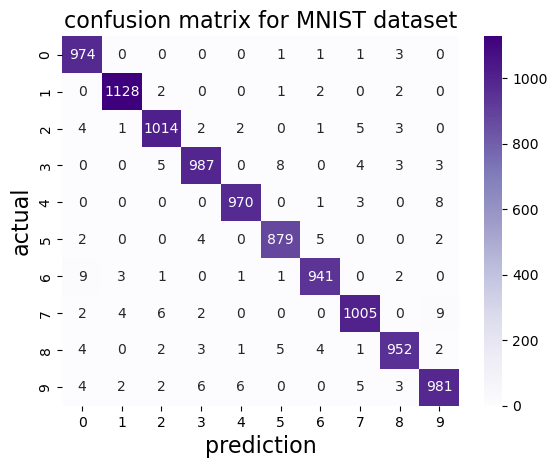

In [15]:
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
ax.set_title('confusion matrix for MNIST dataset', fontsize=16)
ax.set_xlabel('prediction', fontsize=16)
ax.set_ylabel('actual', fontsize=16)